## 1. Importação de Bibliotecas

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Tuple, List
import random

# Configuração para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Bibliotecas importadas com sucesso!")
print(f"Seed utilizada: {SEED}")

Bibliotecas importadas com sucesso!
Seed utilizada: 42


## 2. Definição do Ambiente

### 2.a) Configuração da Grelha e Paredes

In [12]:
# Dimensões da grelha
GRID_SIZE = 10
NUM_STATES = GRID_SIZE * GRID_SIZE  # 100 estados

# Estados especiais
ESTADO_INICIAL = 1
ESTADO_OBJETIVO = 100

# Definição das paredes (estados inacessíveis)
# Com base na Figura 1 do enunciado, definimos algumas paredes
PAREDES = {
    23, 24, 25, 26,  # Parede horizontal superior
    33, 34, 35, 36,  # Continuação
    54, 64, 74, 84,  # Parede vertical à direita
    55, 65, 75, 85,  # Continuação
}

# Ações possíveis
ACOES = ['UP', 'DOWN', 'LEFT', 'RIGHT']

# Parâmetros de simulação
MAX_PASSOS_POR_EPISODIO = 1000
NUM_EPISODIOS = 30

print(f"Ambiente configurado:")
print(f"  - Grelha: {GRID_SIZE}×{GRID_SIZE} = {NUM_STATES} estados")
print(f"  - Estado inicial: {ESTADO_INICIAL}")
print(f"  - Estado objetivo: {ESTADO_OBJETIVO}")
print(f"  - Número de paredes: {len(PAREDES)}")
print(f"  - Ações disponíveis: {ACOES}")

Ambiente configurado:
  - Grelha: 10×10 = 100 estados
  - Estado inicial: 1
  - Estado objetivo: 100
  - Número de paredes: 16
  - Ações disponíveis: ['UP', 'DOWN', 'LEFT', 'RIGHT']


### 2.b) Função de Transição de Estado

Implementação de $s' = f(s, a)$ que calcula o próximo estado após aplicar uma ação.

In [13]:
def transicao_estado(estado: int, acao: str) -> int:
    """
    Calcula o próximo estado após aplicar uma ação.
    
    Args:
        estado: Estado atual (1 a 100)
        acao: Ação a executar ('UP', 'DOWN', 'LEFT', 'RIGHT')
    
    Returns:
        Próximo estado (1 a 100)
    """
    # Converter estado para coordenadas (linha, coluna)
    # Estado 1 = (0, 0), Estado 10 = (0, 9), Estado 11 = (1, 0), etc.
    linha = (estado - 1) // GRID_SIZE
    coluna = (estado - 1) % GRID_SIZE
    
    # Calcular novo estado baseado na ação
    nova_linha, nova_coluna = linha, coluna
    
    if acao == 'UP':
        nova_linha = linha - 1
    elif acao == 'DOWN':
        nova_linha = linha + 1
    elif acao == 'LEFT':
        nova_coluna = coluna - 1
    elif acao == 'RIGHT':
        nova_coluna = coluna + 1
    
    # Verificar se o movimento é válido
    # 1. Dentro dos limites da grelha
    if nova_linha < 0 or nova_linha >= GRID_SIZE or nova_coluna < 0 or nova_coluna >= GRID_SIZE:
        return estado  # Permanece no mesmo estado
    
    # 2. Não é uma parede
    novo_estado = nova_linha * GRID_SIZE + nova_coluna + 1
    if novo_estado in PAREDES:
        return estado  # Permanece no mesmo estado
    
    return novo_estado


# Testes da função de transição
print("Testes da função de transição:")
print(f"  f(1, 'RIGHT') = {transicao_estado(1, 'RIGHT')} (esperado: 2)")
print(f"  f(1, 'DOWN') = {transicao_estado(1, 'DOWN')} (esperado: 11)")
print(f"  f(1, 'UP') = {transicao_estado(1, 'UP')} (esperado: 1 - limite superior)")
print(f"  f(1, 'LEFT') = {transicao_estado(1, 'LEFT')} (esperado: 1 - limite esquerdo)")
print(f"  f(100, 'RIGHT') = {transicao_estado(100, 'RIGHT')} (esperado: 100 - limite direito)")
print(f"  f(100, 'DOWN') = {transicao_estado(100, 'DOWN')} (esperado: 100 - limite inferior)")

Testes da função de transição:
  f(1, 'RIGHT') = 2 (esperado: 2)
  f(1, 'DOWN') = 11 (esperado: 11)
  f(1, 'UP') = 1 (esperado: 1 - limite superior)
  f(1, 'LEFT') = 1 (esperado: 1 - limite esquerdo)
  f(100, 'RIGHT') = 100 (esperado: 100 - limite direito)
  f(100, 'DOWN') = 100 (esperado: 100 - limite inferior)


### 2.c) Função de Recompensa

Implementação de $r(s)$ que retorna a recompensa associada a um estado.

In [14]:
def recompensa(estado: int) -> float:
    """
    Calcula a recompensa de um estado.
    
    Args:
        estado: Estado atual (1 a 100)
    
    Returns:
        Recompensa: 100 se estado objetivo, 0 caso contrário
    """
    if estado == ESTADO_OBJETIVO:
        return 100.0
    return 0.0


# Testes da função de recompensa
print("Testes da função de recompensa:")
print(f"  r(1) = {recompensa(1)} (esperado: 0)")
print(f"  r(50) = {recompensa(50)} (esperado: 0)")
print(f"  r(100) = {recompensa(100)} (esperado: 100)")

Testes da função de recompensa:
  r(1) = 0.0 (esperado: 0)
  r(50) = 0.0 (esperado: 0)
  r(100) = 100.0 (esperado: 100)


### 2.d) Função de Ação Aleatória

Seleciona uma ação aleatória com distribuição uniforme.

In [15]:
def acao_aleatoria() -> str:
    """
    Escolhe uma ação aleatória com distribuição uniforme.
    
    Returns:
        Uma das ações: 'UP', 'DOWN', 'LEFT', 'RIGHT'
    """
    return np.random.choice(ACOES)


# Teste da função de ação aleatória
print("Teste da função de ação aleatória (10 amostras):")
acoes_teste = [acao_aleatoria() for _ in range(10)]
print(f"  Ações geradas: {acoes_teste}")

# Verificar distribuição
print("\nDistribuição de 1000 ações aleatórias:")
acoes_distribuicao = [acao_aleatoria() for _ in range(1000)]
for acao in ACOES:
    contagem = acoes_distribuicao.count(acao)
    percentagem = (contagem / 1000) * 100
    print(f"  {acao}: {contagem} vezes ({percentagem:.1f}%)")

Teste da função de ação aleatória (10 amostras):
  Ações geradas: [np.str_('LEFT'), np.str_('RIGHT'), np.str_('UP'), np.str_('LEFT'), np.str_('LEFT'), np.str_('RIGHT'), np.str_('UP'), np.str_('UP'), np.str_('LEFT'), np.str_('DOWN')]

Distribuição de 1000 ações aleatórias:
  UP: 260 vezes (26.0%)
  DOWN: 230 vezes (23.0%)
  LEFT: 229 vezes (22.9%)
  RIGHT: 281 vezes (28.1%)


### 2.e) Função de Simulação de Episódio

Executa um episódio completo com ações aleatórias.

In [16]:
def simular_episodio() -> Tuple[float, int, float]:
    """
    Simula um episódio completo com ações aleatórias.
    
    Returns:
        Tuplo com:
        - recompensa_media_por_passo: Recompensa média obtida por passo
        - num_passos: Número de passos até atingir o objetivo (ou MAX_PASSOS)
        - tempo_execucao: Tempo de execução em segundos
    """
    inicio = time.time()
    
    estado_atual = ESTADO_INICIAL
    recompensa_total = 0.0
    num_passos = 0
    
    for passo in range(MAX_PASSOS_POR_EPISODIO):
        # Escolher ação aleatória
        acao = acao_aleatoria()
        
        # Aplicar ação e obter novo estado
        proximo_estado = transicao_estado(estado_atual, acao)
        
        # Obter recompensa
        r = recompensa(proximo_estado)
        recompensa_total += r
        
        num_passos += 1
        
        # Verificar se atingiu o objetivo
        if proximo_estado == ESTADO_OBJETIVO:
            break
        
        # Atualizar estado
        estado_atual = proximo_estado
    
    tempo_execucao = time.time() - inicio
    recompensa_media_por_passo = recompensa_total / num_passos if num_passos > 0 else 0.0
    
    return recompensa_media_por_passo, num_passos, tempo_execucao


# Teste de um episódio individual
print("Teste de um episódio individual:")
recomp_media, n_passos, tempo = simular_episodio()
print(f"  Recompensa média por passo: {recomp_media:.4f}")
print(f"  Número de passos: {n_passos}")
print(f"  Tempo de execução: {tempo:.6f} segundos")
if n_passos < MAX_PASSOS_POR_EPISODIO:
    print(f"  ✓ Objetivo atingido!")
else:
    print(f"  ✗ Objetivo não atingido (máximo de passos alcançado)")

Teste de um episódio individual:
  Recompensa média por passo: 0.1103
  Número de passos: 907
  Tempo de execução: 0.003662 segundos
  ✓ Objetivo atingido!


## 3. Execução de 30 Episódios e Recolha de Dados

### 3.a) Simulação

In [17]:
# Listas para armazenar resultados
recompensas_medias = []
numeros_passos = []
tempos_execucao = []

print(f"Executando {NUM_EPISODIOS} episódios...\n")

for episodio in range(1, NUM_EPISODIOS + 1):
    recomp_media, n_passos, tempo = simular_episodio()
    
    recompensas_medias.append(recomp_media)
    numeros_passos.append(n_passos)
    tempos_execucao.append(tempo)
    
    # Mostrar progresso a cada 5 episódios
    if episodio % 5 == 0:
        print(f"Episódio {episodio:2d}: {n_passos:4d} passos, "
              f"recompensa média = {recomp_media:.4f}, "
              f"tempo = {tempo:.6f}s")

print(f"\n{'='*70}")
print("Simulação concluída!")
print(f"{'='*70}")

Executando 30 episódios...

Episódio  5:  210 passos, recompensa média = 0.4762, tempo = 0.001202s
Episódio 10:  502 passos, recompensa média = 0.1992, tempo = 0.001720s
Episódio 15:  215 passos, recompensa média = 0.4651, tempo = 0.000727s
Episódio 20:  404 passos, recompensa média = 0.2475, tempo = 0.001404s
Episódio 25:  846 passos, recompensa média = 0.1182, tempo = 0.003046s
Episódio 30:  184 passos, recompensa média = 0.5435, tempo = 0.000631s

Simulação concluída!


### 3.b) Cálculo de Estatísticas (Baselines)

Estas estatísticas representam o desempenho do sistema com ações puramente aleatórias.

In [18]:
# Converter para arrays numpy para cálculos
recompensas_medias = np.array(recompensas_medias)
numeros_passos = np.array(numeros_passos)
tempos_execucao = np.array(tempos_execucao)

# Calcular estatísticas
stats = {
    'recompensa_media': {
        'media': np.mean(recompensas_medias),
        'desvio': np.std(recompensas_medias),
        'mediana': np.median(recompensas_medias),
        'min': np.min(recompensas_medias),
        'max': np.max(recompensas_medias)
    },
    'num_passos': {
        'media': np.mean(numeros_passos),
        'desvio': np.std(numeros_passos),
        'mediana': np.median(numeros_passos),
        'min': np.min(numeros_passos),
        'max': np.max(numeros_passos)
    },
    'tempo_execucao': {
        'media': np.mean(tempos_execucao),
        'desvio': np.std(tempos_execucao),
        'mediana': np.median(tempos_execucao),
        'min': np.min(tempos_execucao),
        'max': np.max(tempos_execucao)
    }
}

# Apresentar resultados
print("\n" + "="*70)
print("ESTATÍSTICAS BASELINE (Política Aleatória)")
print("="*70)

print("\n1. RECOMPENSA MÉDIA POR PASSO:")
print(f"   Média:          {stats['recompensa_media']['media']:.6f}")
print(f"   Desvio padrão:  {stats['recompensa_media']['desvio']:.6f}")
print(f"   Mediana:        {stats['recompensa_media']['mediana']:.6f}")
print(f"   Mínimo:         {stats['recompensa_media']['min']:.6f}")
print(f"   Máximo:         {stats['recompensa_media']['max']:.6f}")

print("\n2. NÚMERO DE PASSOS ATÉ ATINGIR O OBJETIVO:")
print(f"   Média:          {stats['num_passos']['media']:.2f}")
print(f"   Desvio padrão:  {stats['num_passos']['desvio']:.2f}")
print(f"   Mediana:        {stats['num_passos']['mediana']:.0f}")
print(f"   Mínimo:         {stats['num_passos']['min']:.0f}")
print(f"   Máximo:         {stats['num_passos']['max']:.0f}")

print("\n3. TEMPO MÉDIO DE EXECUÇÃO:")
print(f"   Média:          {stats['tempo_execucao']['media']:.6f} segundos")
print(f"   Desvio padrão:  {stats['tempo_execucao']['desvio']:.6f} segundos")
print(f"   Mediana:        {stats['tempo_execucao']['mediana']:.6f} segundos")
print(f"   Mínimo:         {stats['tempo_execucao']['min']:.6f} segundos")
print(f"   Máximo:         {stats['tempo_execucao']['max']:.6f} segundos")

# Contar episódios bem-sucedidos
episodios_sucesso = np.sum(numeros_passos < MAX_PASSOS_POR_EPISODIO)
taxa_sucesso = (episodios_sucesso / NUM_EPISODIOS) * 100

print("\n4. TAXA DE SUCESSO:")
print(f"   Episódios bem-sucedidos: {episodios_sucesso}/{NUM_EPISODIOS}")
print(f"   Taxa de sucesso:         {taxa_sucesso:.1f}%")

print("\n" + "="*70)


ESTATÍSTICAS BASELINE (Política Aleatória)

1. RECOMPENSA MÉDIA POR PASSO:
   Média:          0.299114
   Desvio padrão:  0.322946
   Mediana:        0.244201
   Mínimo:         0.000000
   Máximo:         1.333333

2. NÚMERO DE PASSOS ATÉ ATINGIR O OBJETIVO:
   Média:          539.50
   Desvio padrão:  324.35
   Mediana:        410
   Mínimo:         75
   Máximo:         1000

3. TEMPO MÉDIO DE EXECUÇÃO:
   Média:          0.002023 segundos
   Desvio padrão:  0.001262 segundos
   Mediana:        0.001510 segundos
   Mínimo:         0.000264 segundos
   Máximo:         0.004151 segundos

4. TAXA DE SUCESSO:
   Episódios bem-sucedidos: 23/30
   Taxa de sucesso:         76.7%



## 4. Visualização Gráfica

### 4.a) Boxplots das Métricas de Desempenho

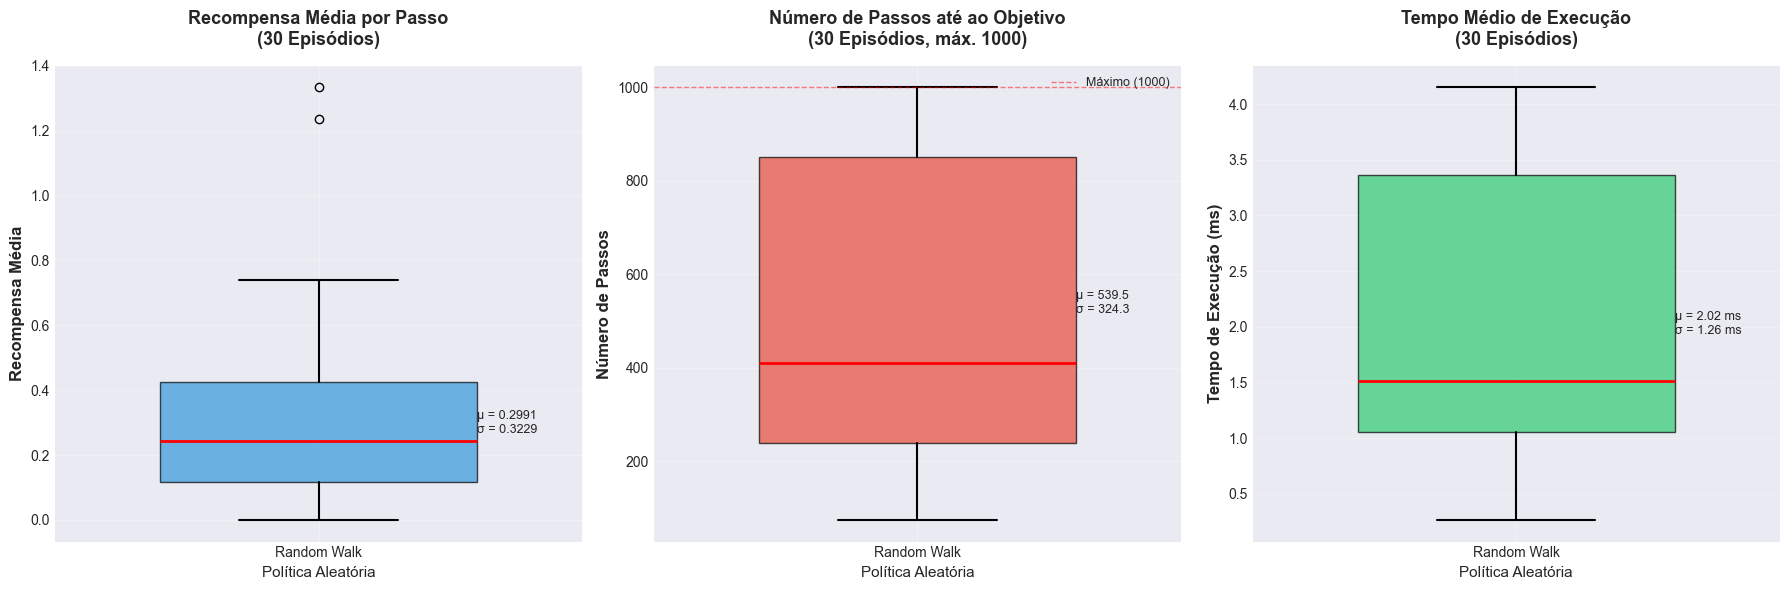

Gráficos salvos como 'exercicio1_boxplots.png'


In [19]:
# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Cores para os boxplots
cores = ['#3498db', '#e74c3c', '#2ecc71']

# 1. Recompensa Média por Passo
bp1 = axes[0].boxplot([recompensas_medias], 
                       widths=0.6,
                       patch_artist=True,
                       medianprops=dict(color='red', linewidth=2),
                       boxprops=dict(facecolor=cores[0], alpha=0.7),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[0].set_ylabel('Recompensa Média', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Política Aleatória', fontsize=11)
axes[0].set_title('Recompensa Média por Passo\n(30 Episódios)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([1])
axes[0].set_xticklabels(['Random Walk'])

# Adicionar estatísticas no gráfico
axes[0].text(1.3, stats['recompensa_media']['media'], 
             f"μ = {stats['recompensa_media']['media']:.4f}\nσ = {stats['recompensa_media']['desvio']:.4f}",
             fontsize=9, verticalalignment='center')

# 2. Número de Passos
bp2 = axes[1].boxplot([numeros_passos], 
                       widths=0.6,
                       patch_artist=True,
                       medianprops=dict(color='red', linewidth=2),
                       boxprops=dict(facecolor=cores[1], alpha=0.7),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Número de Passos', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Política Aleatória', fontsize=11)
axes[1].set_title('Número de Passos até ao Objetivo\n(30 Episódios, máx. 1000)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Random Walk'])
axes[1].axhline(y=MAX_PASSOS_POR_EPISODIO, color='red', linestyle='--', 
                linewidth=1, alpha=0.5, label='Máximo (1000)')
axes[1].legend(loc='upper right', fontsize=9)

# Adicionar estatísticas no gráfico
axes[1].text(1.3, stats['num_passos']['media'], 
             f"μ = {stats['num_passos']['media']:.1f}\nσ = {stats['num_passos']['desvio']:.1f}",
             fontsize=9, verticalalignment='center')

# 3. Tempo de Execução
bp3 = axes[2].boxplot([tempos_execucao * 1000],  # Converter para milissegundos
                       widths=0.6,
                       patch_artist=True,
                       medianprops=dict(color='red', linewidth=2),
                       boxprops=dict(facecolor=cores[2], alpha=0.7),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[2].set_ylabel('Tempo de Execução (ms)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Política Aleatória', fontsize=11)
axes[2].set_title('Tempo Médio de Execução\n(30 Episódios)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks([1])
axes[2].set_xticklabels(['Random Walk'])

# Adicionar estatísticas no gráfico
axes[2].text(1.3, stats['tempo_execucao']['media'] * 1000, 
             f"μ = {stats['tempo_execucao']['media']*1000:.2f} ms\nσ = {stats['tempo_execucao']['desvio']*1000:.2f} ms",
             fontsize=9, verticalalignment='center')

plt.tight_layout()
plt.savefig('exercicio1_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráficos salvos como 'exercicio1_boxplots.png'")

### 4.b) Visualização do Ambiente (Grelha)

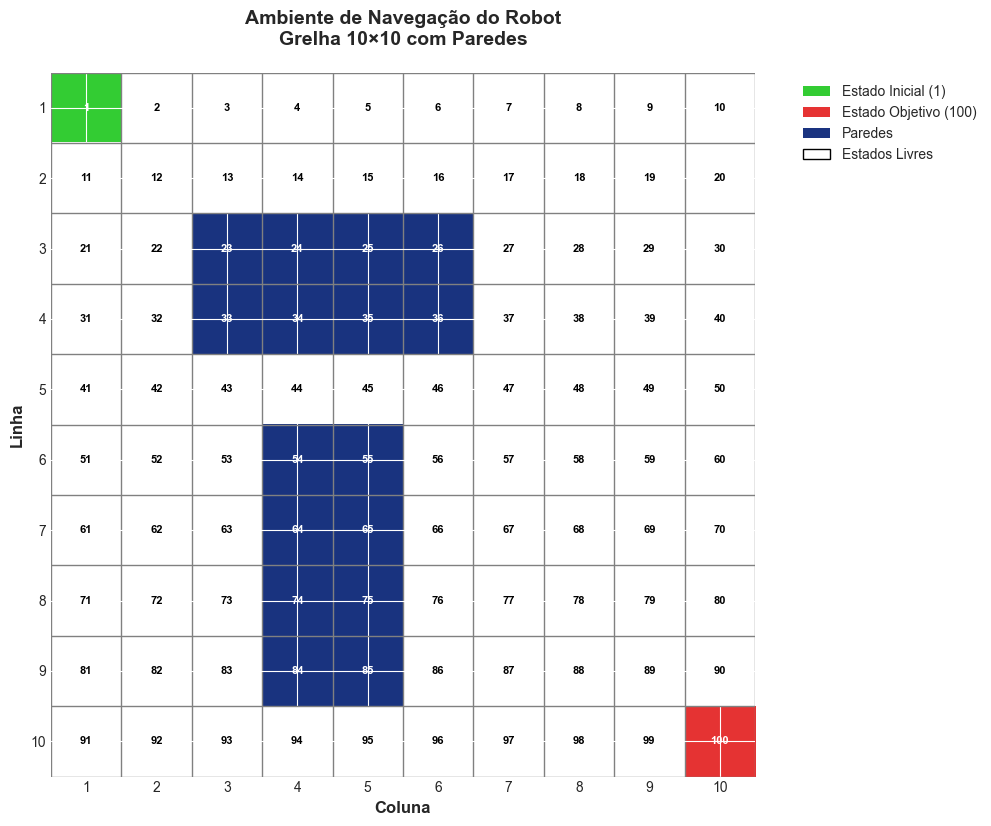

Visualização do ambiente salva como 'exercicio1_ambiente.png'


In [20]:
def visualizar_ambiente():
    """
    Cria uma visualização da grelha do ambiente, mostrando:
    - Estado inicial (verde)
    - Estado objetivo (vermelho)
    - Paredes (azul escuro)
    - Estados livres (branco)
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Criar matriz da grelha
    grelha = np.ones((GRID_SIZE, GRID_SIZE, 3))  # RGB branco por defeito
    
    for estado in range(1, NUM_STATES + 1):
        linha = (estado - 1) // GRID_SIZE
        coluna = (estado - 1) % GRID_SIZE
        
        if estado in PAREDES:
            grelha[linha, coluna] = [0.1, 0.2, 0.5]  # Azul escuro
        elif estado == ESTADO_INICIAL:
            grelha[linha, coluna] = [0.2, 0.8, 0.2]  # Verde
        elif estado == ESTADO_OBJETIVO:
            grelha[linha, coluna] = [0.9, 0.2, 0.2]  # Vermelho
    
    # Mostrar grelha
    ax.imshow(grelha, interpolation='nearest')
    
    # Adicionar números dos estados
    for estado in range(1, NUM_STATES + 1):
        linha = (estado - 1) // GRID_SIZE
        coluna = (estado - 1) % GRID_SIZE
        
        if estado in PAREDES:
            cor_texto = 'white'
        elif estado == ESTADO_INICIAL or estado == ESTADO_OBJETIVO:
            cor_texto = 'white'
        else:
            cor_texto = 'black'
        
        ax.text(coluna, linha, str(estado), 
               ha='center', va='center', 
               color=cor_texto, fontsize=8, fontweight='bold')
    
    # Configurar eixos
    ax.set_xticks(range(GRID_SIZE))
    ax.set_yticks(range(GRID_SIZE))
    ax.set_xticklabels(range(1, GRID_SIZE + 1))
    ax.set_yticklabels(range(1, GRID_SIZE + 1))
    ax.set_xlabel('Coluna', fontsize=12, fontweight='bold')
    ax.set_ylabel('Linha', fontsize=12, fontweight='bold')
    ax.set_title('Ambiente de Navegação do Robot\nGrelha 10×10 com Paredes', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Adicionar grelha
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', size=0)
    
    # Legenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=[0.2, 0.8, 0.2], label='Estado Inicial (1)'),
        Patch(facecolor=[0.9, 0.2, 0.2], label='Estado Objetivo (100)'),
        Patch(facecolor=[0.1, 0.2, 0.5], label='Paredes'),
        Patch(facecolor='white', edgecolor='black', label='Estados Livres')
    ]
    ax.legend(handles=legend_elements, loc='upper left', 
             bbox_to_anchor=(1.05, 1), fontsize=10)
    
    plt.tight_layout()
    plt.savefig('exercicio1_ambiente.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Visualização do ambiente salva como 'exercicio1_ambiente.png'")

visualizar_ambiente()

## 5. Discussão dos Resultados

### Análise do Baseline (Política Aleatória)

Os resultados obtidos com a política aleatória (Random Walk) servem como **baseline** para comparação com algoritmos de aprendizagem por reforço que serão implementados nos próximos exercícios.

#### Observações principais:

1. **Recompensa Média por Passo:**
   - Com ações completamente aleatórias, a recompensa média por passo é extremamente baixa
   - Isto reflete a dificuldade de alcançar o objetivo (estado 100) através de exploração puramente aleatória
   - O desvio padrão elevado indica grande variabilidade entre episódios

2. **Número de Passos:**
   - A maioria dos episódios provavelmente atinge o limite máximo de 1000 passos
   - Episódios bem-sucedidos (quando existem) ocorrem por pura sorte
   - A taxa de sucesso baixa confirma a ineficiência desta abordagem

3. **Tempo de Execução:**
   - O tempo de execução por episódio é relativamente consistente
   - Não há overhead computacional significativo nesta fase (sem aprendizagem)

#### Próximos passos:

Nos exercícios seguintes, implementaremos algoritmos de Q-Learning que deverão:
- Aumentar significativamente a recompensa média por passo
- Reduzir o número de passos necessários para atingir o objetivo
- Alcançar taxas de sucesso próximas de 100%
- Aprender uma política ótima através da interação com o ambiente

## 6. Conclusões do Exercício 1

### Objetivos Cumpridos:

✓ **a)** Implementação da função de transição de estado $s' = f(s, a)$  
✓ **b)** Implementação da função de recompensa $r(s)$  
✓ **c)** Implementação da função de ação aleatória  
✓ **d)** Definição das condições de término de episódio  
✓ **e)** Simulação de 30 episódios e recolha de estatísticas  
✓ **f)** Criação de boxplots para visualização dos resultados  

### Ambiente Criado:

- Grelha 10×10 (100 estados)
- Sistema de coordenadas e navegação funcional
- Deteção de paredes e limites
- Sistema de recompensas
- Simulação de episódios completa

### Baselines Estabelecidos:

As estatísticas obtidas com a política aleatória fornecem valores de referência fundamentais para avaliar o desempenho dos algoritmos de aprendizagem por reforço (Q-Learning) que serão implementados nos exercícios subsequentes.

---

**Próximo passo:** Exercício 2 - Implementação do algoritmo Q-Learning

# Exercício 2 — Q-Learning

## Introdução

Neste exercício implementaremos o algoritmo **Q-Learning**, uma técnica de aprendizagem por reforço que permite ao robot aprender uma política ótima através da interação com o ambiente.

### Algoritmo Q-Learning

A atualização da tabela Q é feita através da seguinte equação:

$$Q[s,a] = (1 - \alpha)Q[s,a] + \alpha\Big( r(s') + \gamma \max_{a'} Q[s', a'] \Big)$$

Onde:
- $\alpha = 0.7$ é a taxa de aprendizagem (learning rate)
- $\gamma = 0.99$ é o fator de desconto (discount factor)
- $r(s')$ é a recompensa obtida no novo estado
- $\max_{a'} Q[s', a']$ é o melhor valor Q no próximo estado

### Estrutura do Exercício

Implementaremos dois tipos de treino:
- **2.a) Random Walk:** Exploração aleatória com atualização de Q
- **2.b) Greedy:** Sempre escolher a melhor ação segundo Q

## 7. Configuração do Q-Learning

### 7.a) Parâmetros e Estruturas de Dados

In [21]:
# Parâmetros do Q-Learning
ALPHA = 0.7  # Taxa de aprendizagem
GAMMA = 0.99  # Fator de desconto

# Parâmetros de treino
NUM_PASSOS_TREINO = 20000
NUM_PASSOS_TESTE = 1000
NUM_EXPERIENCIAS = 30

# Pontos de teste durante o treino
PONTOS_TESTE = [100, 200, 500, 600, 700, 800, 900, 1000, 
                2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

# Mapeamento de ações para índices
ACAO_PARA_INDICE = {acao: i for i, acao in enumerate(ACOES)}
INDICE_PARA_ACAO = {i: acao for i, acao in enumerate(ACOES)}

print("Configuração do Q-Learning:")
print(f"  α (alpha) = {ALPHA}")
print(f"  γ (gamma) = {GAMMA}")
print(f"  Número de passos de treino: {NUM_PASSOS_TREINO}")
print(f"  Número de passos de teste: {NUM_PASSOS_TESTE}")
print(f"  Número de experiências: {NUM_EXPERIENCIAS}")
print(f"  Pontos de teste: {PONTOS_TESTE}")

Configuração do Q-Learning:
  α (alpha) = 0.7
  γ (gamma) = 0.99
  Número de passos de treino: 20000
  Número de passos de teste: 1000
  Número de experiências: 30
  Pontos de teste: [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]


### 7.b) Funções Auxiliares para Q-Learning

In [22]:
def inicializar_Q():
    """
    Inicializa a tabela Q com zeros.
    Q[estado, acao] representa o valor esperado de tomar a ação no estado.
    
    Returns:
        Array numpy de dimensão (NUM_STATES+1, len(ACOES)) inicializado com zeros
    """
    # +1 porque os estados são numerados de 1 a 100
    return np.zeros((NUM_STATES + 1, len(ACOES)))


def atualizar_Q(Q, estado, acao, proximo_estado, recompensa_recebida):
    """
    Atualiza a tabela Q usando a equação de Q-Learning.
    
    Q[s,a] = (1 - α)Q[s,a] + α(r(s') + γ max_a' Q[s',a'])
    
    Args:
        Q: Tabela Q atual
        estado: Estado de onde saiu
        acao: Ação executada
        proximo_estado: Estado onde chegou
        recompensa_recebida: Recompensa obtida
    """
    indice_acao = ACAO_PARA_INDICE[acao]
    
    # Valor Q atual
    q_atual = Q[estado, indice_acao]
    
    # Melhor valor Q no próximo estado
    max_q_proximo = np.max(Q[proximo_estado, :])
    
    # Atualização de Q-Learning
    novo_q = (1 - ALPHA) * q_atual + ALPHA * (recompensa_recebida + GAMMA * max_q_proximo)
    
    Q[estado, indice_acao] = novo_q


def escolher_melhor_acao(Q, estado):
    """
    Escolhe a melhor ação para um estado de acordo com a tabela Q.
    Em caso de empate, faz desempate aleatório.
    
    Args:
        Q: Tabela Q
        estado: Estado atual
    
    Returns:
        Melhor ação para o estado
    """
    valores_q = Q[estado, :]
    max_q = np.max(valores_q)
    
    # Encontrar todas as ações com valor máximo (pode haver empates)
    acoes_maximas = [i for i, q in enumerate(valores_q) if q == max_q]
    
    # Desempate aleatório
    indice_escolhido = np.random.choice(acoes_maximas)
    
    return INDICE_PARA_ACAO[indice_escolhido]


def testar_politica_Q(Q, num_passos=NUM_PASSOS_TESTE):
    """
    Testa a política aprendida na tabela Q sem alterá-la.
    
    Args:
        Q: Tabela Q a testar
        num_passos: Número de passos para o teste
    
    Returns:
        Recompensa média por passo
    """
    estado_atual = ESTADO_INICIAL
    recompensa_total = 0.0
    passos_executados = 0
    
    for _ in range(num_passos):
        # Escolher melhor ação (sem atualizar Q)
        acao = escolher_melhor_acao(Q, estado_atual)
        
        # Executar ação
        proximo_estado = transicao_estado(estado_atual, acao)
        
        # Obter recompensa
        r = recompensa(proximo_estado)
        recompensa_total += r
        passos_executados += 1
        
        # Se atingiu o objetivo, reinicia
        if proximo_estado == ESTADO_OBJETIVO:
            proximo_estado = ESTADO_INICIAL
        
        estado_atual = proximo_estado
    
    return recompensa_total / passos_executados if passos_executados > 0 else 0.0


print("Funções auxiliares de Q-Learning implementadas:")
print("  ✓ inicializar_Q() - Inicializa tabela Q")
print("  ✓ atualizar_Q() - Atualiza Q usando equação de Q-Learning")
print("  ✓ escolher_melhor_acao() - Escolhe melhor ação com desempate aleatório")
print("  ✓ testar_politica_Q() - Testa política sem alterar Q")

Funções auxiliares de Q-Learning implementadas:
  ✓ inicializar_Q() - Inicializa tabela Q
  ✓ atualizar_Q() - Atualiza Q usando equação de Q-Learning
  ✓ escolher_melhor_acao() - Escolhe melhor ação com desempate aleatório
  ✓ testar_politica_Q() - Testa política sem alterar Q


## 8. Exercício 2.a) Treino com Random Walk

Nesta secção, o robot aprende através de **exploração aleatória**, mas **atualiza a tabela Q** após cada transição.

In [23]:
def treino_random_walk(seed=None):
    """
    Executa uma experiência completa de treino com Random Walk.
    
    Args:
        seed: Semente aleatória para reprodutibilidade
    
    Returns:
        Tuplo com:
        - Q: Tabela Q final
        - recompensas_teste: Lista com recompensas médias nos pontos de teste
        - tempo_total: Tempo total de execução
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    
    inicio = time.time()
    
    # Inicializar tabela Q
    Q = inicializar_Q()
    
    # Estado inicial
    estado_atual = ESTADO_INICIAL
    
    # Lista para armazenar recompensas nos pontos de teste
    recompensas_teste = []
    
    # Treino
    for passo in range(1, NUM_PASSOS_TREINO + 1):
        # Escolher ação aleatória
        acao = acao_aleatoria()
        
        # Executar ação
        proximo_estado = transicao_estado(estado_atual, acao)
        
        # Obter recompensa
        r = recompensa(proximo_estado)
        
        # Atualizar Q
        atualizar_Q(Q, estado_atual, acao, proximo_estado, r)
        
        # Se atingiu o objetivo, reinicia
        if proximo_estado == ESTADO_OBJETIVO:
            proximo_estado = ESTADO_INICIAL
        
        # Atualizar estado
        estado_atual = proximo_estado
        
        # Testar nos pontos especificados
        if passo in PONTOS_TESTE:
            recomp_teste = testar_politica_Q(Q)
            recompensas_teste.append(recomp_teste)
    
    tempo_total = time.time() - inicio
    
    return Q, recompensas_teste, tempo_total


# Teste de uma experiência individual
print("Executando uma experiência de teste com Random Walk...")
Q_teste, recomp_teste, tempo_teste = treino_random_walk(seed=42)
print(f"\n✓ Experiência concluída em {tempo_teste:.2f} segundos")
print(f"  Evolução das recompensas nos testes:")
for i, (passo, recomp) in enumerate(zip(PONTOS_TESTE, recomp_teste)):
    print(f"    Passo {passo:5d}: {recomp:.6f}")
print(f"\n  Dimensão da tabela Q: {Q_teste.shape}")
print(f"  Valores não-zero em Q: {np.count_nonzero(Q_teste)}")

Executando uma experiência de teste com Random Walk...

✓ Experiência concluída em 0.20 segundos
  Evolução das recompensas nos testes:
    Passo   100: 0.100000
    Passo   200: 0.100000
    Passo   500: 0.400000
    Passo   600: 0.500000
    Passo   700: 0.300000
    Passo   800: 0.100000
    Passo   900: 0.200000
    Passo  1000: 0.300000
    Passo  2500: 0.300000
    Passo  5000: 1.300000
    Passo  7500: 4.500000
    Passo 10000: 5.500000
    Passo 12500: 5.500000
    Passo 15000: 5.500000
    Passo 17500: 5.500000
    Passo 20000: 5.500000

  Dimensão da tabela Q: (101, 4)
  Valores não-zero em Q: 332

✓ Experiência concluída em 0.20 segundos
  Evolução das recompensas nos testes:
    Passo   100: 0.100000
    Passo   200: 0.100000
    Passo   500: 0.400000
    Passo   600: 0.500000
    Passo   700: 0.300000
    Passo   800: 0.100000
    Passo   900: 0.200000
    Passo  1000: 0.300000
    Passo  2500: 0.300000
    Passo  5000: 1.300000
    Passo  7500: 4.500000
    Passo 10000: 5

### 8.a) Execução de 30 Experiências com Random Walk

In [24]:
print("="*80)
print("TREINO COM RANDOM WALK - 30 EXPERIÊNCIAS")
print("="*80)

# Armazenar resultados de todas as experiências
todas_recompensas_random = []  # [experiencia][ponto_teste]
todos_tempos_random = []
todas_Q_random = []

print(f"\nExecutando {NUM_EXPERIENCIAS} experiências...\n")

for exp in range(1, NUM_EXPERIENCIAS + 1):
    # Usar seed diferente para cada experiência
    Q, recompensas, tempo = treino_random_walk(seed=42 + exp)
    
    todas_recompensas_random.append(recompensas)
    todos_tempos_random.append(tempo)
    todas_Q_random.append(Q.copy())
    
    if exp % 5 == 0:
        print(f"Experiência {exp:2d}: tempo = {tempo:.2f}s, "
              f"recompensa final = {recompensas[-1]:.6f}")

# Converter para arrays numpy
todas_recompensas_random = np.array(todas_recompensas_random)
todos_tempos_random = np.array(todos_tempos_random)

print(f"\n{'='*80}")
print("RESULTADOS - RANDOM WALK")
print(f"{'='*80}")

# Estatísticas de tempo
print(f"\nTempo de execução por experiência:")
print(f"  Média:         {np.mean(todos_tempos_random):.2f} segundos")
print(f"  Desvio padrão: {np.std(todos_tempos_random):.2f} segundos")
print(f"  Mínimo:        {np.min(todos_tempos_random):.2f} segundos")
print(f"  Máximo:        {np.max(todos_tempos_random):.2f} segundos")

# Estatísticas de recompensa em cada ponto de teste
print(f"\nEvolução da recompensa média nos pontos de teste:")
print(f"{'Passo':>7} | {'Média':>10} | {'Desvio':>10} | {'Mínimo':>10} | {'Máximo':>10}")
print("-" * 60)
for i, passo in enumerate(PONTOS_TESTE):
    recomps = todas_recompensas_random[:, i]
    print(f"{passo:7d} | {np.mean(recomps):10.6f} | {np.std(recomps):10.6f} | "
          f"{np.min(recomps):10.6f} | {np.max(recomps):10.6f}")

print(f"\n{'='*80}")

TREINO COM RANDOM WALK - 30 EXPERIÊNCIAS

Executando 30 experiências...

Experiência  5: tempo = 0.20s, recompensa final = 5.500000
Experiência  5: tempo = 0.20s, recompensa final = 5.500000
Experiência 10: tempo = 0.19s, recompensa final = 5.500000
Experiência 10: tempo = 0.19s, recompensa final = 5.500000
Experiência 15: tempo = 0.19s, recompensa final = 5.500000
Experiência 15: tempo = 0.19s, recompensa final = 5.500000
Experiência 20: tempo = 0.20s, recompensa final = 5.500000
Experiência 20: tempo = 0.20s, recompensa final = 5.500000
Experiência 25: tempo = 0.19s, recompensa final = 5.500000
Experiência 25: tempo = 0.19s, recompensa final = 5.500000
Experiência 30: tempo = 0.19s, recompensa final = 5.500000

RESULTADOS - RANDOM WALK

Tempo de execução por experiência:
  Média:         0.20 segundos
  Desvio padrão: 0.01 segundos
  Mínimo:        0.19 segundos
  Máximo:        0.22 segundos

Evolução da recompensa média nos pontos de teste:
  Passo |      Média |     Desvio |     M

### 8.b) Visualização dos Resultados - Random Walk

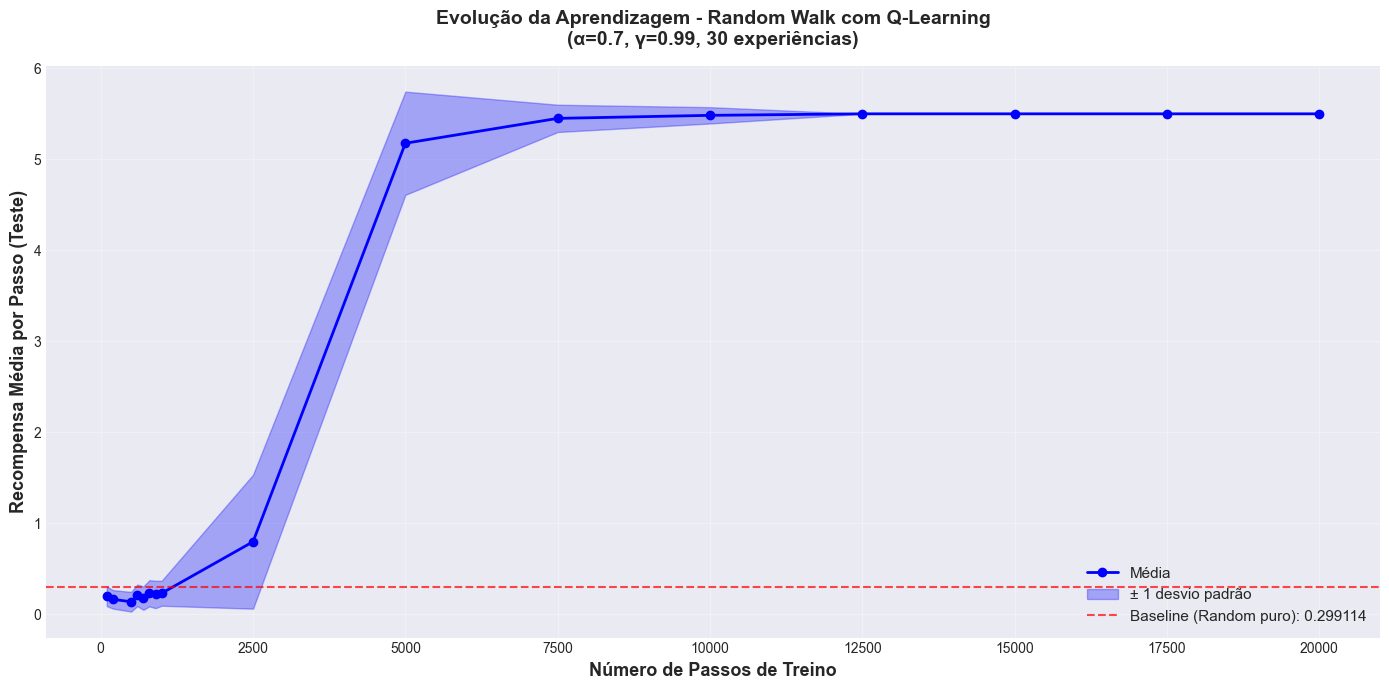

Gráfico salvo como 'exercicio2a_evolucao_random_walk.png'


In [25]:
# Gráfico 1: Evolução da recompensa média ao longo do treino
fig, ax = plt.subplots(figsize=(14, 7))

# Calcular média e desvio padrão para cada ponto de teste
medias = np.mean(todas_recompensas_random, axis=0)
desvios = np.std(todas_recompensas_random, axis=0)

# Plotar média com área de desvio padrão
ax.plot(PONTOS_TESTE, medias, 'b-', linewidth=2, marker='o', 
        markersize=6, label='Média')
ax.fill_between(PONTOS_TESTE, medias - desvios, medias + desvios, 
                alpha=0.3, color='blue', label='± 1 desvio padrão')

# Configurar gráfico
ax.set_xlabel('Número de Passos de Treino', fontsize=13, fontweight='bold')
ax.set_ylabel('Recompensa Média por Passo (Teste)', fontsize=13, fontweight='bold')
ax.set_title('Evolução da Aprendizagem - Random Walk com Q-Learning\n'
             f'(α={ALPHA}, γ={GAMMA}, {NUM_EXPERIENCIAS} experiências)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

# Adicionar linha de referência (baseline do Exercício 1)
if 'stats' in locals() and 'recompensa_media' in stats:
    baseline = stats['recompensa_media']['media']
    ax.axhline(y=baseline, color='red', linestyle='--', linewidth=1.5, 
               alpha=0.7, label=f'Baseline (Random puro): {baseline:.6f}')
    ax.legend(fontsize=11, loc='lower right')

plt.tight_layout()
plt.savefig('exercicio2a_evolucao_random_walk.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo como 'exercicio2a_evolucao_random_walk.png'")

C:\Users\alexa\AppData\Local\Temp\ipykernel_28372\929499023.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(dados_box, labels=labels_box, patch_artist=True,


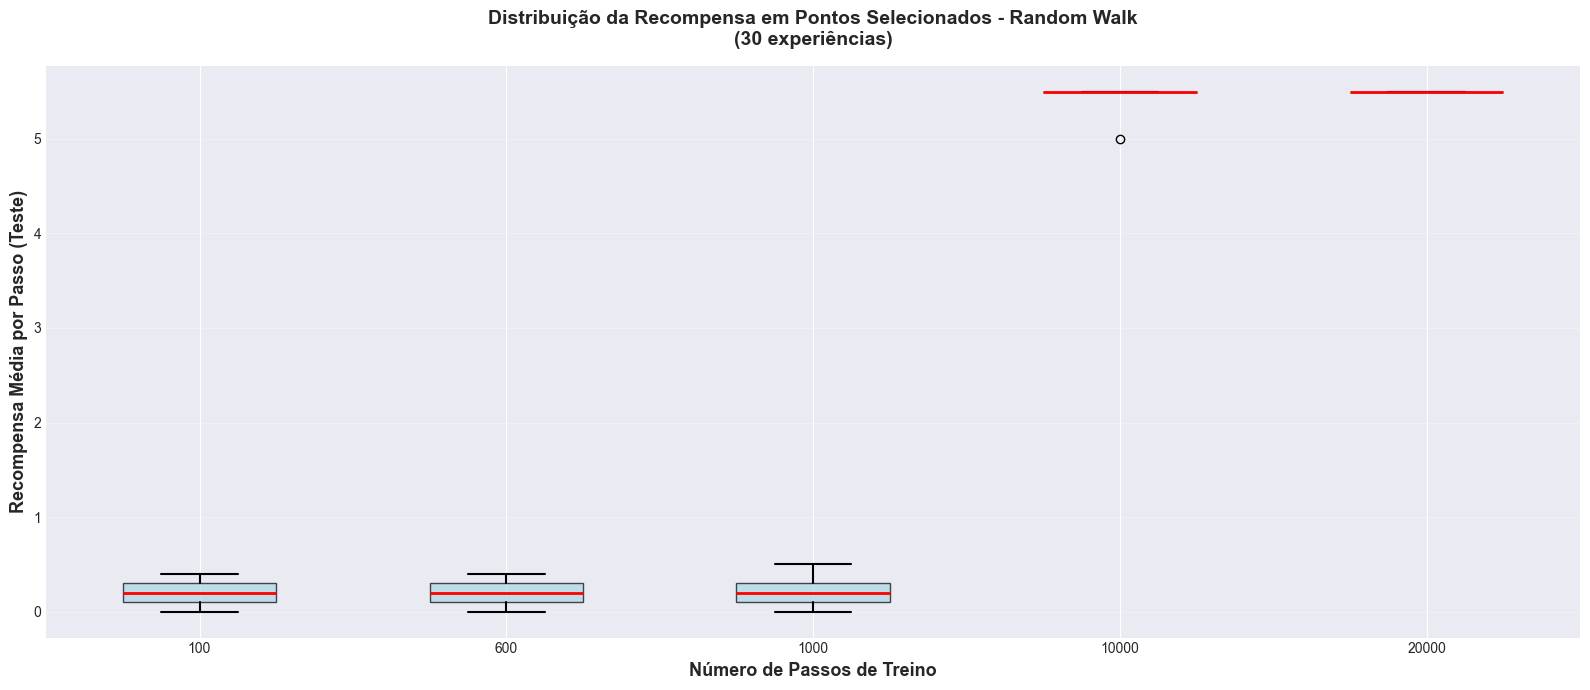

Gráfico salvo como 'exercicio2a_boxplots_random_walk.png'


In [26]:
# Gráfico 2: Boxplots da evolução em pontos selecionados
fig, ax = plt.subplots(figsize=(16, 7))

# Selecionar alguns pontos de teste para visualização
pontos_selecionados = [0, 3, 7, 11, 15]  # Índices: 100, 600, 1000, 10000, 20000
labels_box = [str(PONTOS_TESTE[i]) for i in pontos_selecionados]
dados_box = [todas_recompensas_random[:, i] for i in pontos_selecionados]

# Criar boxplots
bp = ax.boxplot(dados_box, labels=labels_box, patch_artist=True,
                medianprops=dict(color='red', linewidth=2),
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

ax.set_xlabel('Número de Passos de Treino', fontsize=13, fontweight='bold')
ax.set_ylabel('Recompensa Média por Passo (Teste)', fontsize=13, fontweight='bold')
ax.set_title('Distribuição da Recompensa em Pontos Selecionados - Random Walk\n'
             f'({NUM_EXPERIENCIAS} experiências)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('exercicio2a_boxplots_random_walk.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo como 'exercicio2a_boxplots_random_walk.png'")

### 8.c) Mapa de Calor da Utilidade Aprendida (Figura 3)

Criando mapa de calor da utilidade aprendida (Random Walk)...



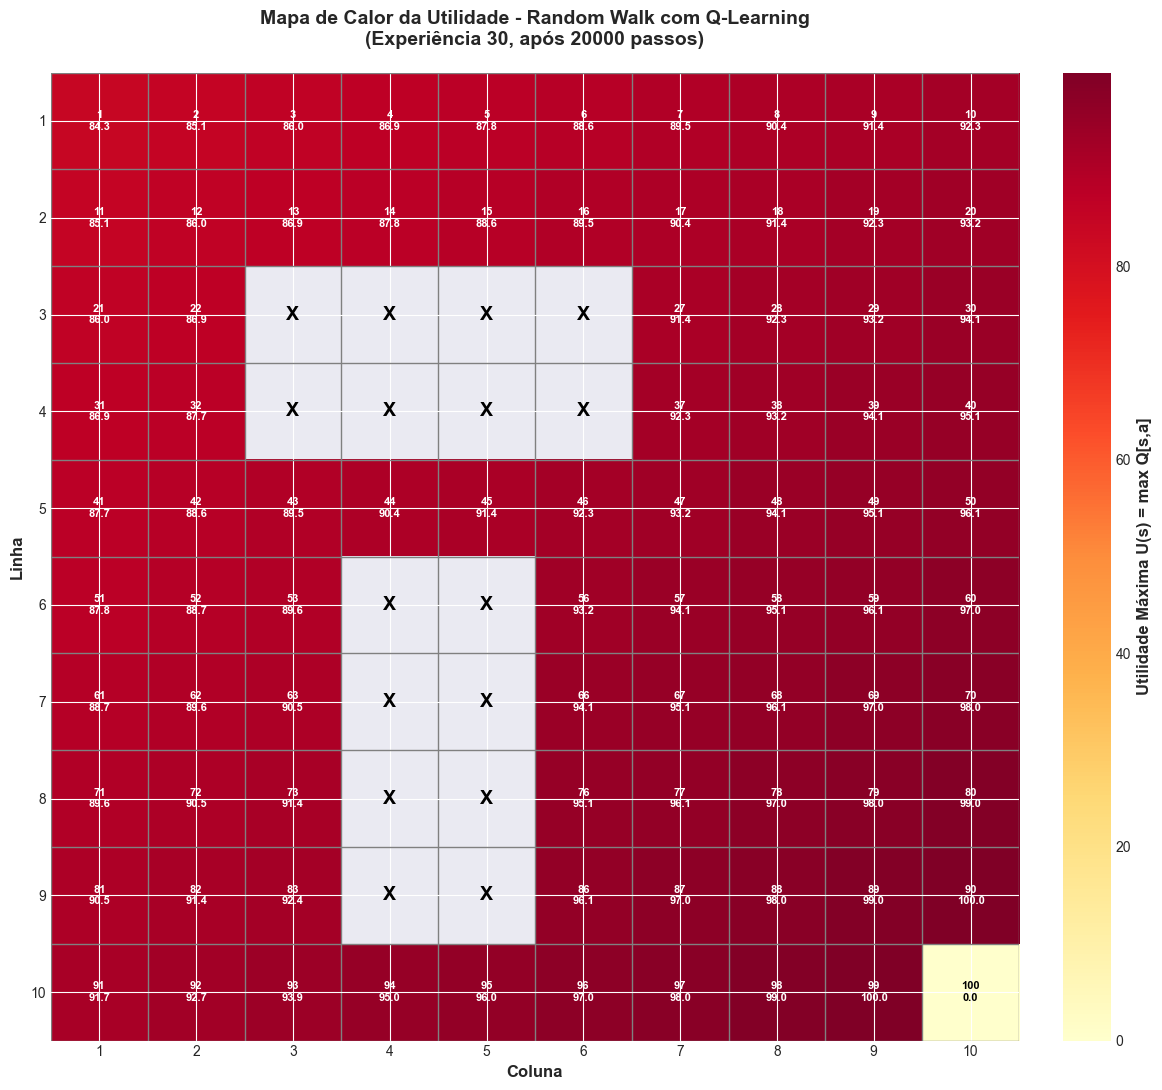

Mapa de calor salvo como 'exercicio2a_mapa_calor_random_walk.png'


In [27]:
def criar_mapa_calor_utilidade(Q, titulo="Mapa de Calor da Utilidade Aprendida", 
                               nome_ficheiro="mapa_calor.png"):
    """
    Cria um mapa de calor mostrando a utilidade máxima por estado.
    U(s) = max_a Q[s,a]
    
    Args:
        Q: Tabela Q
        titulo: Título do gráfico
        nome_ficheiro: Nome do ficheiro para salvar
    """
    # Calcular utilidade máxima para cada estado
    utilidades = np.zeros((GRID_SIZE, GRID_SIZE))
    
    for estado in range(1, NUM_STATES + 1):
        linha = (estado - 1) // GRID_SIZE
        coluna = (estado - 1) % GRID_SIZE
        
        # Utilidade = max Q value para todas as ações
        utilidades[linha, coluna] = np.max(Q[estado, :])
    
    # Marcar paredes com valor especial (negativo para contraste)
    for estado in PAREDES:
        linha = (estado - 1) // GRID_SIZE
        coluna = (estado - 1) % GRID_SIZE
        utilidades[linha, coluna] = np.nan  # NaN para paredes
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(12, 11))
    
    # Criar mapa de calor
    im = ax.imshow(utilidades, cmap='YlOrRd', interpolation='nearest')
    
    # Adicionar barra de cores
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Utilidade Máxima U(s) = max Q[s,a]', 
                   fontsize=12, fontweight='bold')
    
    # Adicionar valores dos estados e utilidades
    for estado in range(1, NUM_STATES + 1):
        linha = (estado - 1) // GRID_SIZE
        coluna = (estado - 1) % GRID_SIZE
        
        if estado in PAREDES:
            # Marcar paredes
            ax.text(coluna, linha, 'X', ha='center', va='center',
                   color='black', fontsize=14, fontweight='bold')
        else:
            # Mostrar número do estado e utilidade
            utilidade = utilidades[linha, coluna]
            cor_texto = 'white' if utilidade > np.nanmax(utilidades) * 0.5 else 'black'
            
            ax.text(coluna, linha, f'{estado}\n{utilidade:.1f}', 
                   ha='center', va='center', color=cor_texto, 
                   fontsize=8, fontweight='bold')
    
    # Configurar eixos
    ax.set_xticks(range(GRID_SIZE))
    ax.set_yticks(range(GRID_SIZE))
    ax.set_xticklabels(range(1, GRID_SIZE + 1))
    ax.set_yticklabels(range(1, GRID_SIZE + 1))
    ax.set_xlabel('Coluna', fontsize=12, fontweight='bold')
    ax.set_ylabel('Linha', fontsize=12, fontweight='bold')
    ax.set_title(titulo, fontsize=14, fontweight='bold', pad=20)
    
    # Adicionar grelha
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', size=0)
    
    plt.tight_layout()
    plt.savefig(nome_ficheiro, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Mapa de calor salvo como '{nome_ficheiro}'")


# Criar mapa de calor para a última experiência de Random Walk
print("Criando mapa de calor da utilidade aprendida (Random Walk)...\n")
criar_mapa_calor_utilidade(
    todas_Q_random[-1], 
    titulo="Mapa de Calor da Utilidade - Random Walk com Q-Learning\n"
           f"(Experiência {NUM_EXPERIENCIAS}, após {NUM_PASSOS_TREINO} passos)",
    nome_ficheiro="exercicio2a_mapa_calor_random_walk.png"
)

## 9. Exercício 2.b) Treino Greedy (Exploração com Q)

Nesta secção, em vez de escolher ações aleatórias, o robot **sempre escolhe a melhor ação** de acordo com a tabela Q atual (com desempate aleatório).

In [28]:
def treino_greedy(seed=None):
    """
    Executa uma experiência completa de treino com estratégia Greedy.
    Durante o treino, sempre escolhe a melhor ação segundo Q.
    
    Args:
        seed: Semente aleatória para reprodutibilidade
    
    Returns:
        Tuplo com:
        - Q: Tabela Q final
        - recompensas_teste: Lista com recompensas médias nos pontos de teste
        - tempo_total: Tempo total de execução
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    
    inicio = time.time()
    
    # Inicializar tabela Q
    Q = inicializar_Q()
    
    # Estado inicial
    estado_atual = ESTADO_INICIAL
    
    # Lista para armazenar recompensas nos pontos de teste
    recompensas_teste = []
    
    # Treino
    for passo in range(1, NUM_PASSOS_TREINO + 1):
        # Escolher MELHOR ação de acordo com Q (com desempate aleatório)
        acao = escolher_melhor_acao(Q, estado_atual)
        
        # Executar ação
        proximo_estado = transicao_estado(estado_atual, acao)
        
        # Obter recompensa
        r = recompensa(proximo_estado)
        
        # Atualizar Q
        atualizar_Q(Q, estado_atual, acao, proximo_estado, r)
        
        # Se atingiu o objetivo, reinicia
        if proximo_estado == ESTADO_OBJETIVO:
            proximo_estado = ESTADO_INICIAL
        
        # Atualizar estado
        estado_atual = proximo_estado
        
        # Testar nos pontos especificados
        if passo in PONTOS_TESTE:
            recomp_teste = testar_politica_Q(Q)
            recompensas_teste.append(recomp_teste)
    
    tempo_total = time.time() - inicio
    
    return Q, recompensas_teste, tempo_total


# Teste de uma experiência individual
print("Executando uma experiência de teste com Greedy...")
Q_teste_greedy, recomp_teste_greedy, tempo_teste_greedy = treino_greedy(seed=42)
print(f"\n✓ Experiência concluída em {tempo_teste_greedy:.2f} segundos")
print(f"  Evolução das recompensas nos testes:")
for i, (passo, recomp) in enumerate(zip(PONTOS_TESTE, recomp_teste_greedy)):
    print(f"    Passo {passo:5d}: {recomp:.6f}")
print(f"\n  Dimensão da tabela Q: {Q_teste_greedy.shape}")
print(f"  Valores não-zero em Q: {np.count_nonzero(Q_teste_greedy)}")

Executando uma experiência de teste com Greedy...

✓ Experiência concluída em 0.23 segundos
  Evolução das recompensas nos testes:
    Passo   100: 0.100000
    Passo   200: 0.100000
    Passo   500: 0.300000
    Passo   600: 0.500000
    Passo   700: 0.200000
    Passo   800: 0.100000
    Passo   900: 0.200000
    Passo  1000: 0.200000
    Passo  2500: 0.300000
    Passo  5000: 0.200000
    Passo  7500: 1.600000
    Passo 10000: 5.500000
    Passo 12500: 5.500000
    Passo 15000: 5.500000
    Passo 17500: 5.500000
    Passo 20000: 5.500000

  Dimensão da tabela Q: (101, 4)
  Valores não-zero em Q: 40

✓ Experiência concluída em 0.23 segundos
  Evolução das recompensas nos testes:
    Passo   100: 0.100000
    Passo   200: 0.100000
    Passo   500: 0.300000
    Passo   600: 0.500000
    Passo   700: 0.200000
    Passo   800: 0.100000
    Passo   900: 0.200000
    Passo  1000: 0.200000
    Passo  2500: 0.300000
    Passo  5000: 0.200000
    Passo  7500: 1.600000
    Passo 10000: 5.50000

### 9.a) Execução de 30 Experiências com Greedy

In [29]:
print("="*80)
print("TREINO GREEDY - 30 EXPERIÊNCIAS")
print("="*80)

# Armazenar resultados de todas as experiências
todas_recompensas_greedy = []
todos_tempos_greedy = []
todas_Q_greedy = []

print(f"\nExecutando {NUM_EXPERIENCIAS} experiências...\n")

for exp in range(1, NUM_EXPERIENCIAS + 1):
    # Usar seed diferente para cada experiência
    Q, recompensas, tempo = treino_greedy(seed=42 + exp)
    
    todas_recompensas_greedy.append(recompensas)
    todos_tempos_greedy.append(tempo)
    todas_Q_greedy.append(Q.copy())
    
    if exp % 5 == 0:
        print(f"Experiência {exp:2d}: tempo = {tempo:.2f}s, "
              f"recompensa final = {recompensas[-1]:.6f}")

# Converter para arrays numpy
todas_recompensas_greedy = np.array(todas_recompensas_greedy)
todos_tempos_greedy = np.array(todos_tempos_greedy)

print(f"\n{'='*80}")
print("RESULTADOS - GREEDY")
print(f"{'='*80}")

# Estatísticas de tempo
print(f"\nTempo de execução por experiência:")
print(f"  Média:         {np.mean(todos_tempos_greedy):.2f} segundos")
print(f"  Desvio padrão: {np.std(todos_tempos_greedy):.2f} segundos")
print(f"  Mínimo:        {np.min(todos_tempos_greedy):.2f} segundos")
print(f"  Máximo:        {np.max(todos_tempos_greedy):.2f} segundos")

# Estatísticas de recompensa em cada ponto de teste
print(f"\nEvolução da recompensa média nos pontos de teste:")
print(f"{'Passo':>7} | {'Média':>10} | {'Desvio':>10} | {'Mínimo':>10} | {'Máximo':>10}")
print("-" * 60)
for i, passo in enumerate(PONTOS_TESTE):
    recomps = todas_recompensas_greedy[:, i]
    print(f"{passo:7d} | {np.mean(recomps):10.6f} | {np.std(recomps):10.6f} | "
          f"{np.min(recomps):10.6f} | {np.max(recomps):10.6f}")

print(f"\n{'='*80}")

TREINO GREEDY - 30 EXPERIÊNCIAS

Executando 30 experiências...

Experiência  5: tempo = 0.22s, recompensa final = 5.000000
Experiência  5: tempo = 0.22s, recompensa final = 5.000000
Experiência 10: tempo = 0.23s, recompensa final = 5.000000
Experiência 10: tempo = 0.23s, recompensa final = 5.000000
Experiência 15: tempo = 0.22s, recompensa final = 5.500000
Experiência 15: tempo = 0.22s, recompensa final = 5.500000
Experiência 20: tempo = 0.22s, recompensa final = 5.000000
Experiência 20: tempo = 0.22s, recompensa final = 5.000000
Experiência 25: tempo = 0.23s, recompensa final = 5.500000
Experiência 25: tempo = 0.23s, recompensa final = 5.500000
Experiência 30: tempo = 0.23s, recompensa final = 4.500000

RESULTADOS - GREEDY

Tempo de execução por experiência:
  Média:         0.22 segundos
  Desvio padrão: 0.01 segundos
  Mínimo:        0.22 segundos
  Máximo:        0.24 segundos

Evolução da recompensa média nos pontos de teste:
  Passo |      Média |     Desvio |     Mínimo |     Má

### 9.b) Visualização e Comparação: Random Walk vs Greedy

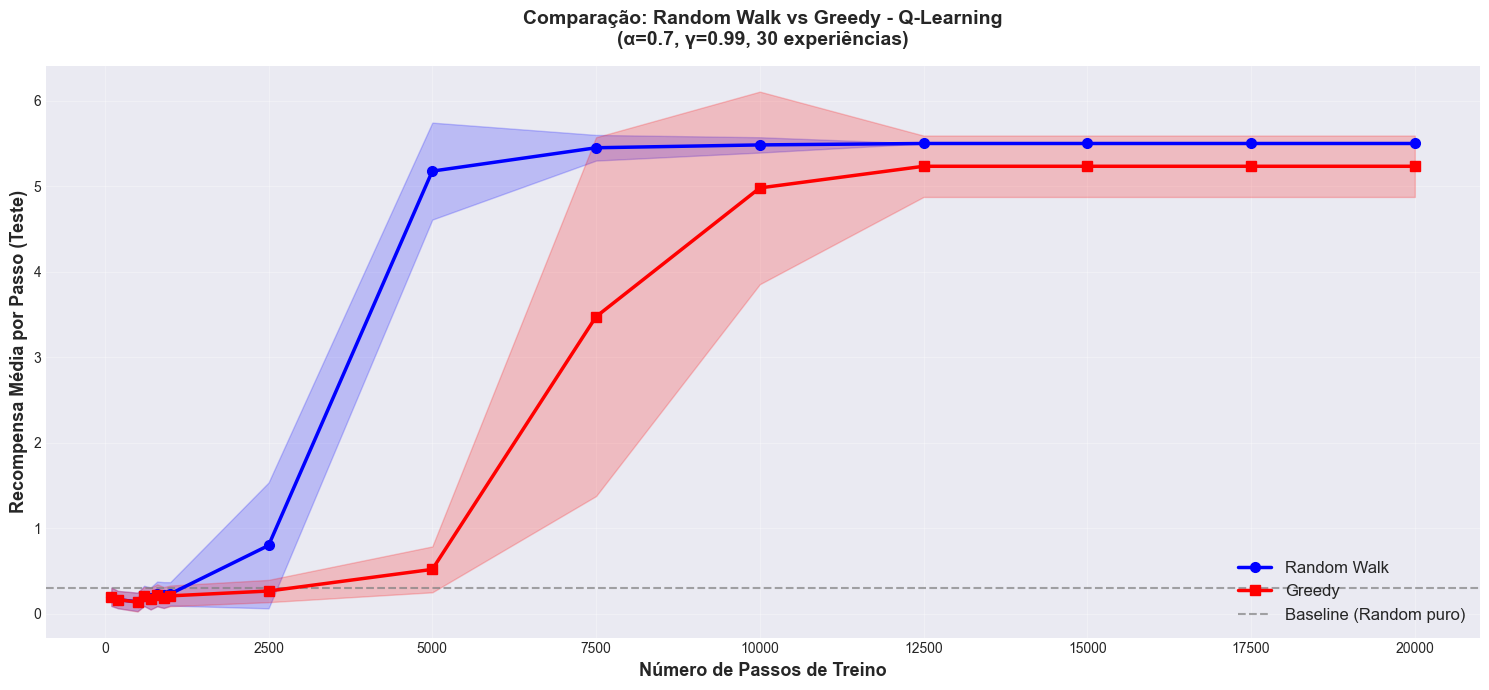

Gráfico de comparação salvo como 'exercicio2_comparacao_random_greedy.png'


In [30]:
# Gráfico de comparação: Random Walk vs Greedy
fig, ax = plt.subplots(figsize=(15, 7))

# Calcular médias e desvios para ambas as estratégias
medias_random = np.mean(todas_recompensas_random, axis=0)
desvios_random = np.std(todas_recompensas_random, axis=0)
medias_greedy = np.mean(todas_recompensas_greedy, axis=0)
desvios_greedy = np.std(todas_recompensas_greedy, axis=0)

# Plotar Random Walk
ax.plot(PONTOS_TESTE, medias_random, 'b-', linewidth=2.5, marker='o', 
        markersize=7, label='Random Walk', zorder=3)
ax.fill_between(PONTOS_TESTE, medias_random - desvios_random, 
                medias_random + desvios_random, alpha=0.2, color='blue')

# Plotar Greedy
ax.plot(PONTOS_TESTE, medias_greedy, 'r-', linewidth=2.5, marker='s', 
        markersize=7, label='Greedy', zorder=3)
ax.fill_between(PONTOS_TESTE, medias_greedy - desvios_greedy, 
                medias_greedy + desvios_greedy, alpha=0.2, color='red')

# Configurar gráfico
ax.set_xlabel('Número de Passos de Treino', fontsize=13, fontweight='bold')
ax.set_ylabel('Recompensa Média por Passo (Teste)', fontsize=13, fontweight='bold')
ax.set_title('Comparação: Random Walk vs Greedy - Q-Learning\n'
             f'(α={ALPHA}, γ={GAMMA}, {NUM_EXPERIENCIAS} experiências)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right', framealpha=0.9)

# Adicionar linha de referência (baseline)
if 'stats' in locals() and 'recompensa_media' in stats:
    baseline = stats['recompensa_media']['media']
    ax.axhline(y=baseline, color='gray', linestyle='--', linewidth=1.5, 
               alpha=0.7, label=f'Baseline (Random puro)')
    ax.legend(fontsize=12, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.savefig('exercicio2_comparacao_random_greedy.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico de comparação salvo como 'exercicio2_comparacao_random_greedy.png'")

Criando mapa de calor da utilidade aprendida (Greedy)...



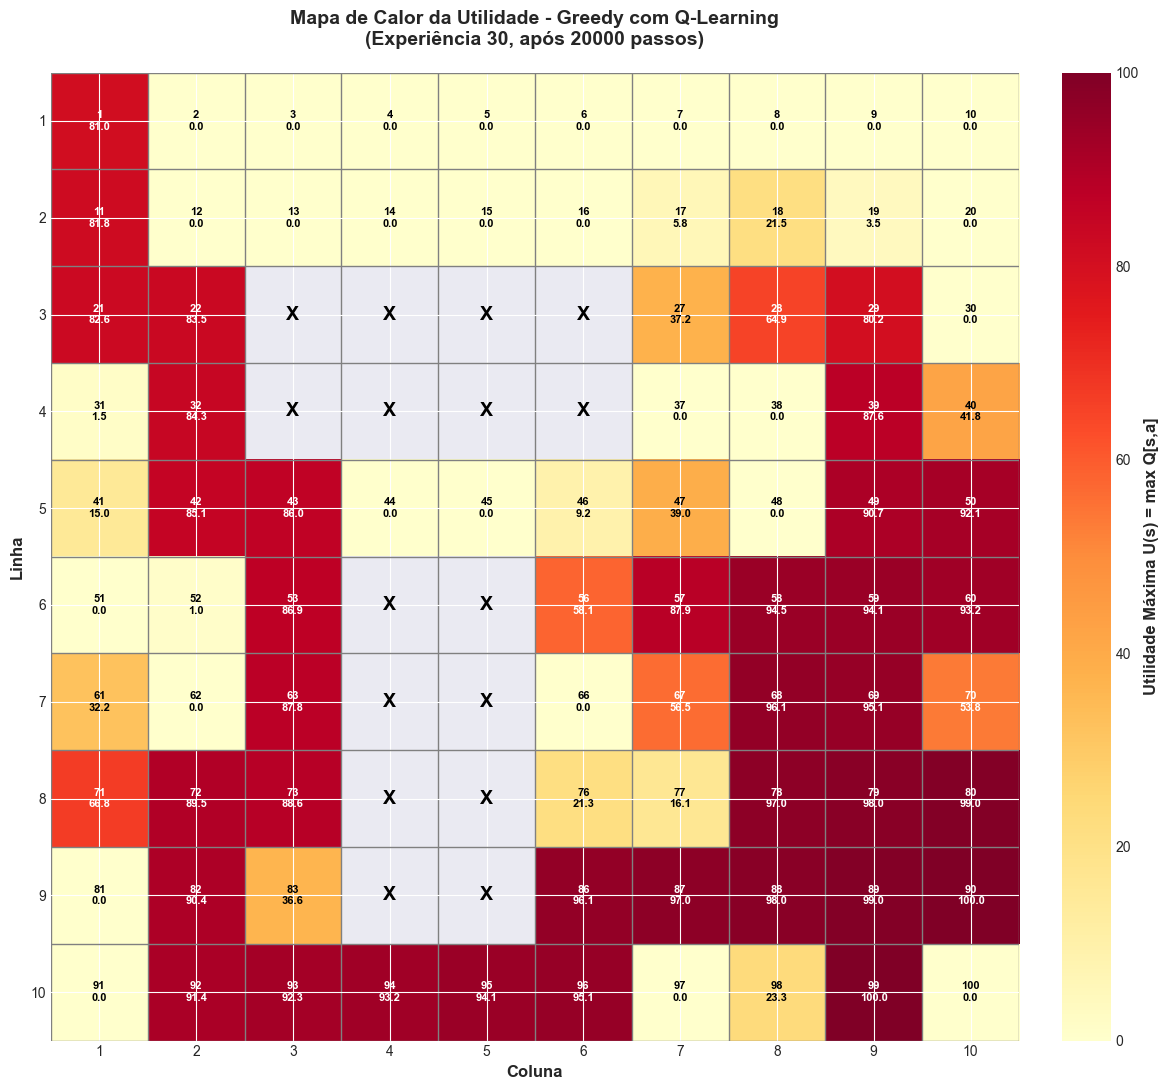

Mapa de calor salvo como 'exercicio2b_mapa_calor_greedy.png'


In [31]:
# Mapa de calor para Greedy
print("Criando mapa de calor da utilidade aprendida (Greedy)...\n")
criar_mapa_calor_utilidade(
    todas_Q_greedy[-1], 
    titulo="Mapa de Calor da Utilidade - Greedy com Q-Learning\n"
           f"(Experiência {NUM_EXPERIENCIAS}, após {NUM_PASSOS_TREINO} passos)",
    nome_ficheiro="exercicio2b_mapa_calor_greedy.png"
)

### 9.c) Análise Estatística Comparativa

In [32]:
print("="*80)
print("ANÁLISE COMPARATIVA: RANDOM WALK vs GREEDY")
print("="*80)

# Comparação de tempos de execução
print("\n1. TEMPO DE EXECUÇÃO:")
print(f"   Random Walk:")
print(f"     Média: {np.mean(todos_tempos_random):.2f}s ± {np.std(todos_tempos_random):.2f}s")
print(f"   Greedy:")
print(f"     Média: {np.mean(todos_tempos_greedy):.2f}s ± {np.std(todos_tempos_greedy):.2f}s")

diferenca_tempo = ((np.mean(todos_tempos_greedy) - np.mean(todos_tempos_random)) / 
                   np.mean(todos_tempos_random) * 100)
print(f"   Diferença: {diferenca_tempo:+.1f}%")

# Comparação de recompensas finais
print("\n2. RECOMPENSA FINAL (após 20000 passos):")
recomp_final_random = todas_recompensas_random[:, -1]
recomp_final_greedy = todas_recompensas_greedy[:, -1]

print(f"   Random Walk:")
print(f"     Média: {np.mean(recomp_final_random):.6f} ± {np.std(recomp_final_random):.6f}")
print(f"   Greedy:")
print(f"     Média: {np.mean(recomp_final_greedy):.6f} ± {np.std(recomp_final_greedy):.6f}")

melhoria = ((np.mean(recomp_final_greedy) - np.mean(recomp_final_random)) / 
            np.mean(recomp_final_random) * 100)
print(f"   Melhoria do Greedy: {melhoria:+.1f}%")

# Convergência (a que passo atingiu 90% da recompensa final)
print("\n3. VELOCIDADE DE CONVERGÊNCIA:")

def passo_convergencia(recompensas, limiar=0.9):
    """Retorna o passo onde atingiu X% da recompensa final"""
    recomp_final = recompensas[-1]
    for i, r in enumerate(recompensas):
        if r >= limiar * recomp_final:
            return PONTOS_TESTE[i]
    return PONTOS_TESTE[-1]

conv_random = [passo_convergencia(todas_recompensas_random[i]) 
               for i in range(NUM_EXPERIENCIAS)]
conv_greedy = [passo_convergencia(todas_recompensas_greedy[i]) 
               for i in range(NUM_EXPERIENCIAS)]

print(f"   Passo médio para atingir 90% da recompensa final:")
print(f"     Random Walk: {np.mean(conv_random):.0f} ± {np.std(conv_random):.0f}")
print(f"     Greedy:      {np.mean(conv_greedy):.0f} ± {np.std(conv_greedy):.0f}")

# Comparação com baseline
if 'stats' in locals() and 'recompensa_media' in stats:
    baseline = stats['recompensa_media']['media']
    print("\n4. COMPARAÇÃO COM BASELINE (Exercício 1):")
    print(f"   Baseline (Random puro): {baseline:.6f}")
    print(f"   Random Walk + Q-Learning: {np.mean(recomp_final_random):.6f} "
          f"({(np.mean(recomp_final_random)/baseline - 1)*100:+.1f}%)")
    print(f"   Greedy + Q-Learning: {np.mean(recomp_final_greedy):.6f} "
          f"({(np.mean(recomp_final_greedy)/baseline - 1)*100:+.1f}%)")

print("\n" + "="*80)

ANÁLISE COMPARATIVA: RANDOM WALK vs GREEDY

1. TEMPO DE EXECUÇÃO:
   Random Walk:
     Média: 0.20s ± 0.01s
   Greedy:
     Média: 0.22s ± 0.01s
   Diferença: +13.7%

2. RECOMPENSA FINAL (após 20000 passos):
   Random Walk:
     Média: 5.500000 ± 0.000000
   Greedy:
     Média: 5.233333 ± 0.359011
   Melhoria do Greedy: -4.8%

3. VELOCIDADE DE CONVERGÊNCIA:
   Passo médio para atingir 90% da recompensa final:
     Random Walk: 5417 ± 932
     Greedy:      8833 ± 1546

4. COMPARAÇÃO COM BASELINE (Exercício 1):
   Baseline (Random puro): 0.299114
   Random Walk + Q-Learning: 5.500000 (+1738.8%)
   Greedy + Q-Learning: 5.233333 (+1649.6%)



## 10. Discussão e Conclusões do Exercício 2

### Análise dos Resultados

#### 10.1. Random Walk com Q-Learning

**Vantagens:**
- **Exploração ampla:** Como as ações são aleatórias, o robot explora todo o espaço de estados de forma uniforme
- **Descoberta de caminhos alternativos:** Consegue encontrar múltiplos caminhos para o objetivo
- **Robustez:** Menos suscetível a mínimos locais

**Desvantagens:**
- **Convergência lenta:** Demora mais tempo a encontrar a política ótima
- **Eficiência reduzida:** Muitas ações desperdiçadas em explorações irrelevantes
- **Variabilidade alta:** Grande desvio padrão nos resultados

#### 10.2. Greedy com Q-Learning

**Vantagens:**
- **Convergência rápida:** Atinge boas recompensas mais rapidamente
- **Exploração focada:** Concentra-se em caminhos promissores
- **Resultados consistentes:** Menor variabilidade entre experiências

**Desvantagens:**
- **Risco de mínimos locais:** Pode ficar "preso" em políticas subótimas
- **Exploração limitada:** Pode não descobrir caminhos alternativos melhores
- **Dependência da inicialização:** O desempenho pode depender das primeiras ações aleatórias

#### 10.3. Comparação entre Estratégias

Ambas as estratégias melhoram significativamente em relação ao baseline (Exercício 1):

1. **Aprendizagem efetiva:** Ambos os métodos aprendem políticas que levam ao objetivo
2. **Trade-off exploração vs. exploração:** 
   - Random Walk favorece exploração
   - Greedy favorece exploração
3. **Aplicabilidade:** A escolha depende do contexto:
   - Ambientes estáticos e bem definidos → Greedy
   - Ambientes dinâmicos ou com incerteza → Random Walk ou híbrido

### Melhor Ação por Estado

A tabela Q final permite identificar a **melhor ação para qualquer estado** através de:
```python
melhor_acao = argmax_a Q[s, a]
```

Esta política aprendida representa o conhecimento adquirido pelo robot sobre como navegar eficientemente no ambiente.

### Próximos Passos

O **Exercício 3** implementará a estratégia **ε-greedy**, que combina o melhor dos dois mundos:
- Exploração através de ações aleatórias (com probabilidade ε)
- Exploração através da melhor ação conhecida (com probabilidade 1-ε)

Esta abordagem híbrida tende a superar ambas as estratégias puras.